In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

#### initial data check

In [2]:
#reading the file
df=pd.read_csv('AviationData.csv',encoding = 'latin1', low_memory=False)

In [3]:
#checking the first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# check summary/info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# check column labels
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#check datatypes
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [7]:
# check the last five rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [8]:
# check the shape of the data frame
df.shape

(88889, 31)

In [9]:
#get basic statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [10]:
#count missing values per column
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## selecting relevant columns

In [11]:
# columns needed to be kept
necessary_columns = ['Event.Id', 'Event.Date', 'Location', 'Make', 'Model', 'Engine.Type', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Broad.phase.of.flight', 'Aircraft.Category', 'Number.of.Engines']
necessary_columns

['Event.Id',
 'Event.Date',
 'Location',
 'Make',
 'Model',
 'Engine.Type',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Broad.phase.of.flight',
 'Aircraft.Category',
 'Number.of.Engines']

In [12]:
# now we create a new dataframe with the new columns
df = df[necessary_columns].copy() # the .copy() is to avoid warnings later
df

,Event.Id,Event.Date,Location,Make,Model,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Broad.phase.of.flight,Aircraft.Category,Number.of.Engines
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Reciprocating,2.0,0.0,Cruise,NaN,1.0
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Reciprocating,4.0,0.0,Unknown,NaN,1.0
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna,172M,Reciprocating,3.0,NaN,Cruise,NaN,1.0
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell,112,Reciprocating,2.0,0.0,Cruise,NaN,1.0
4,20041105X01764,1979-08-02,"Canton, OH",Cessna,501,NaN,1.0,2.0,Approach,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER,PA-28-151,NaN,0.0,1.0,NaN,NaN,NaN
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA,7ECA,NaN,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,0.0,0.0,NaN,Airplane,1.0
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA,210N,NaN,0.0,0.0,NaN,NaN,NaN


## handling missing data

In [13]:
# first we check for missing data on the new dataframe
df.isnull().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Engine.Type                7096
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Broad.phase.of.flight     27165
Aircraft.Category         56602
Number.of.Engines          6084
dtype: int64

In [14]:
#checking for unique values 
df.nunique(dropna=False)

Event.Id                  87951
Event.Date                14782
Location                  27759
Make                       8238
Model                     12319
Engine.Type                  13
Total.Fatal.Injuries        126
Total.Serious.Injuries       51
Broad.phase.of.flight        13
Aircraft.Category            16
Number.of.Engines             8
dtype: int64

## handling missing categorical data

In [15]:

# checking for unique values
print(df['Broad.phase.of.flight'].value_counts(dropna=False))

Broad.phase.of.flight
NaN            27165
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64


In [16]:
# filling miising rows with a new category 'NULL'
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('NULL')
df['Broad.phase.of.flight']

0          Cruise
1         Unknown
2          Cruise
3          Cruise
4        Approach
           ...   
88884        NULL
88885        NULL
88886        NULL
88887        NULL
88888        NULL
Name: Broad.phase.of.flight, Length: 88889, dtype: object

# handling missing numerical data

In [17]:
# assume if data is missing in the column it means no injury, so we replace missing rows with the value 0
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_1784\1356706460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Fatal.Injuries'].fillna(0, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_1784\1356706460.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [18]:
# handling missing dates
# convert to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# drop rows with invalid dates
df= df[df['Event.Date'].notna()]
df

,Event.Id,Event.Date,Location,Make,Model,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Broad.phase.of.flight,Aircraft.Category,Number.of.Engines
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Reciprocating,2.0,0.0,Cruise,NaN,1.0
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Reciprocating,4.0,0.0,Unknown,NaN,1.0
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna,172M,Reciprocating,3.0,0.0,Cruise,NaN,1.0
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell,112,Reciprocating,2.0,0.0,Cruise,NaN,1.0
4,20041105X01764,1979-08-02,"Canton, OH",Cessna,501,NaN,1.0,2.0,Approach,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER,PA-28-151,NaN,0.0,1.0,NULL,NaN,NaN
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA,7ECA,NaN,0.0,0.0,NULL,NaN,NaN
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,0.0,0.0,NULL,Airplane,1.0
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA,210N,NaN,0.0,0.0,NULL,NaN,NaN


# handling missing aircraft information

In [19]:
# drop if either of the aircraft information is missing is missing
df.dropna(subset=['Make', 'Model', 'Engine.Type', 'Aircraft.Category', 'Number.of.Engines'], how='any', inplace=True)


In [20]:
# this the final missing data check
df.isnull().sum()

Event.Id                  0
Event.Date                0
Location                  1
Make                      0
Model                     0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Broad.phase.of.flight     0
Aircraft.Category         0
Number.of.Engines         0
dtype: int64

# exploring the data

In [21]:
# checking the top ten aircraft models by accident count
top_models = df['Model'].value_counts().head(10)
top_models

Model
172          738
152          416
172N         302
182          284
172S         258
180          227
PA28         223
150          218
SR22         202
PA-28-140    200
Name: count, dtype: int64

In [22]:
# see unique aircraft manufacturers
df['Make'].value_counts().head(10)


Make
CESSNA      3929
Cessna      3453
PIPER       2303
Piper       1821
BEECH        781
Beech        614
BELL         386
BOEING       317
Bell         282
Robinson     262
Name: count, dtype: int64

In [23]:
# see unique flight phases
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
NULL           18714
Landing         2437
Takeoff         1403
Cruise           974
Maneuvering      748
Approach         705
Taxi             256
Descent          184
Climb            167
Go-around        157
Standing          95
Unknown           61
Other             18
Name: count, dtype: int64

In [24]:
# now we check distribution across different locations
df['Location'].value_counts().head(10)

Location
Anchorage, AK    96
Phoenix, AZ      72
Palmer, AK       71
Talkeetna, AK    68
Atlanta, GA      63
Fairbanks, AK    62
Houston, TX      55
Las Vegas, NV    52
Miami, FL        50
Reno, NV         50
Name: count, dtype: int64

In [25]:
# Now checking the worst accidents by fatalities
# First we'll analyze the injury data
print(df['Total.Fatal.Injuries'].describe())

print(df['Total.Serious.Injuries'].describe())


count    25919.000000
mean         0.337899
std          2.158264
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        228.000000
Name: Total.Fatal.Injuries, dtype: float64
count    25919.000000
mean         0.254099
std          1.550504
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        137.000000
Name: Total.Serious.Injuries, dtype: float64


In [26]:
# now we check the worst accidents by fatalities
print(df.sort_values('Total.Fatal.Injuries', ascending=False).head(5)[['Event.Date', 'Make', 'Model', 'Total.Fatal.Injuries']])

      Event.Date            Make      Model  Total.Fatal.Injuries
42415 1997-08-06          Boeing    747-300                 228.0
68601 2010-07-28          AIRBUS       A321                 157.0
60583 2006-05-03          Airbus       A320                 113.0
51485 2001-09-11          Boeing  767-200ER                  65.0
65940 2009-02-13  BOMBARDIER INC  DHC-8-402                  49.0


## analysis and visualization

# now we want to check the behaviour of the accidents rates, if they are increasing or decreasing over time

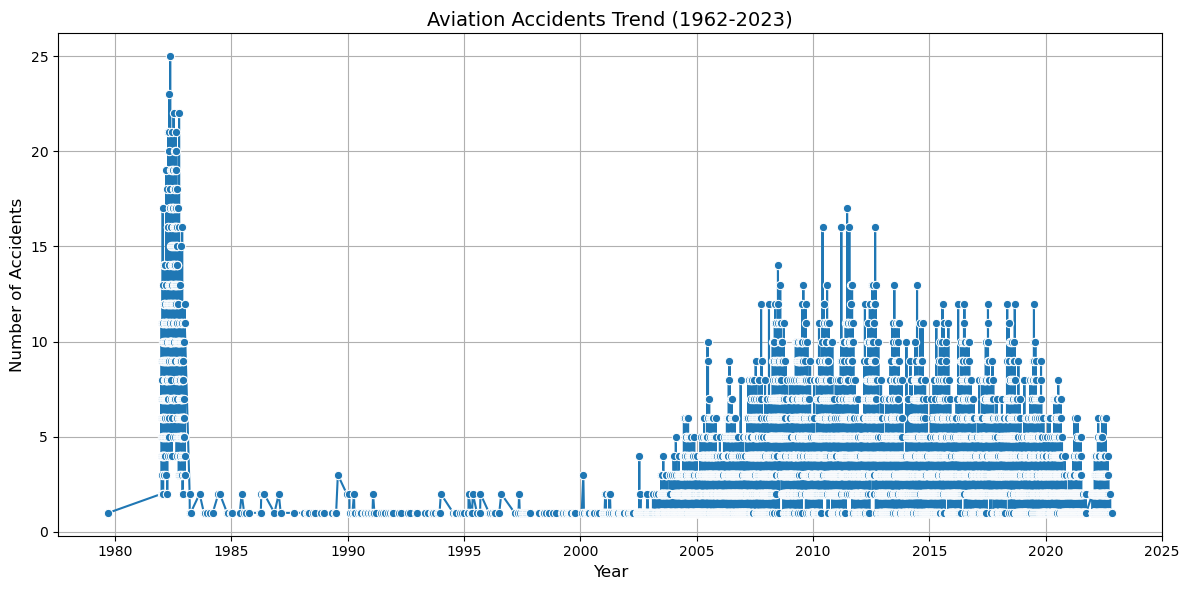

In [27]:
plt.figure(figsize=(12, 6))
yearly_accidents = df['Event.Date'].value_counts().sort_index()
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o')
plt.title('Aviation Accidents Trend (1962-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

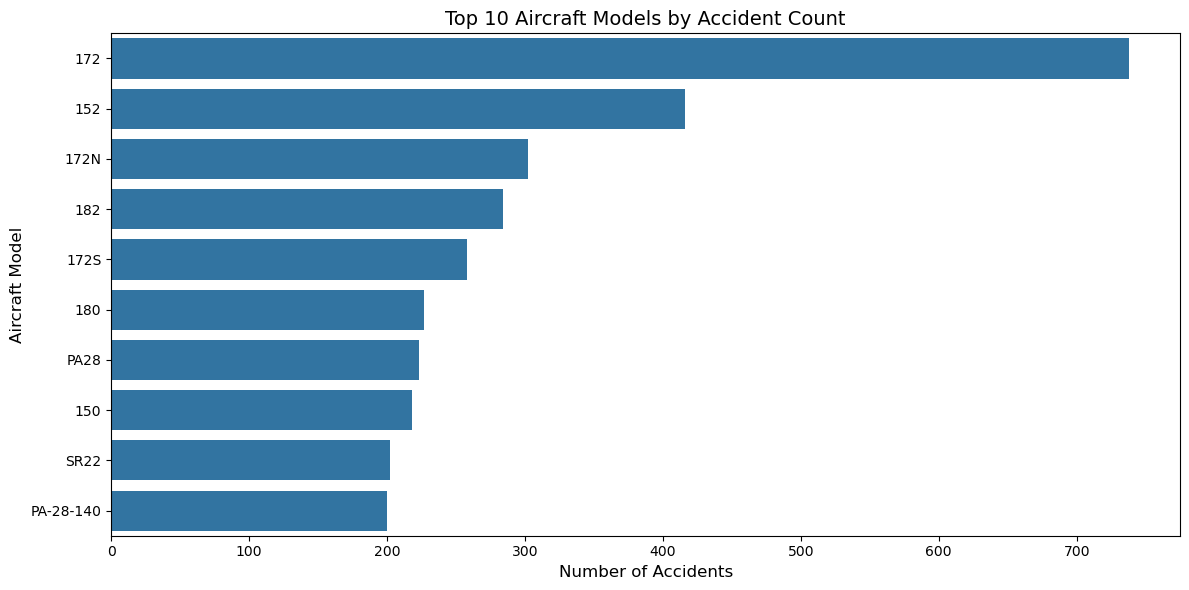

In [28]:
# now we want to check the top ten aircraft models withthe mos accidents

plt.figure(figsize=(12, 6))
top_models = df['Model'].value_counts().head(10)
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top 10 Aircraft Models by Accident Count', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)
plt.tight_layout()
plt.show()

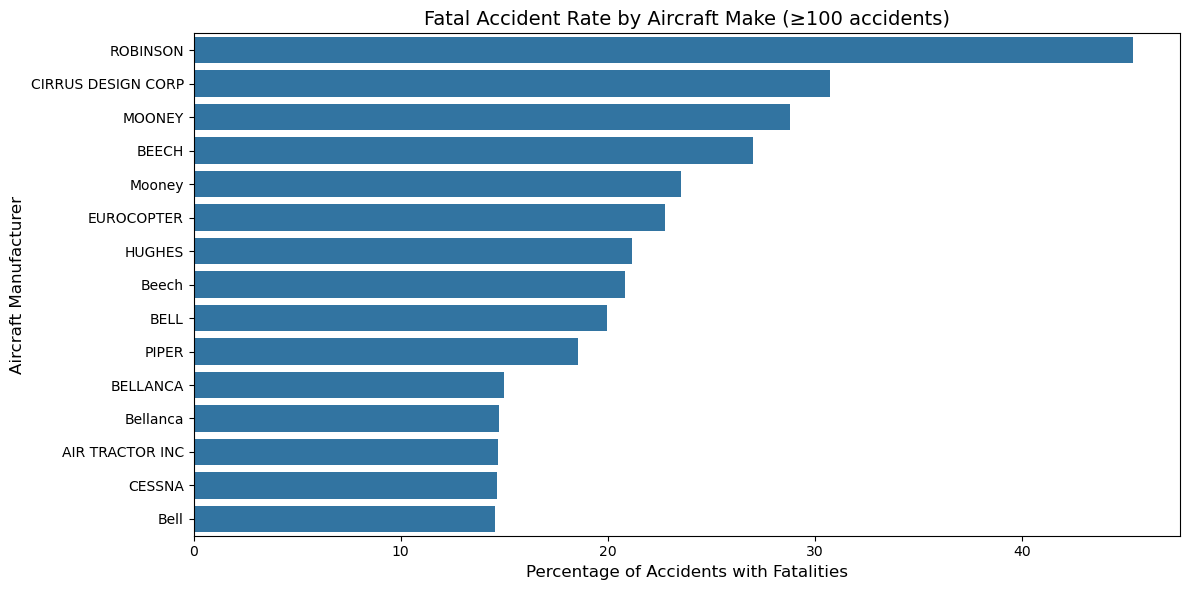

In [29]:
# checking fatal accident rates by aicraft make
# this is to check which makes  had the most accidents
plt.figure(figsize=(12, 6))
make_stats = df.groupby('Make').agg(
    total_accidents=('Make', 'size'),
    fatal_accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())
).query('total_accidents >= 100')  # Only consider makes with ≥100 accidents

make_stats['fatal_rate'] = (make_stats['fatal_accidents'] / make_stats['total_accidents']) * 100
make_stats = make_stats.sort_values('fatal_rate', ascending=False).head(15)

sns.barplot(x='fatal_rate', y=make_stats.index, data=make_stats)
plt.title('Fatal Accident Rate by Aircraft Make (≥100 accidents)', fontsize=14)
plt.xlabel('Percentage of Accidents with Fatalities', fontsize=12)
plt.ylabel('Aircraft Manufacturer', fontsize=12)
plt.tight_layout()
plt.show()

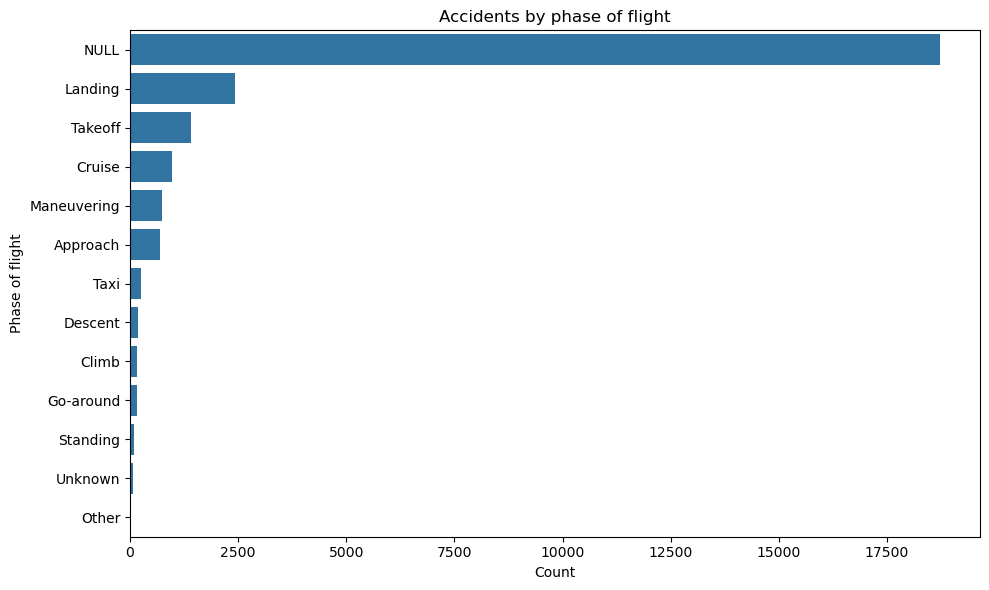

In [30]:
# now we check the accidents by phase of flight
# this is to identify the riskiest phases i.e takeoff,landing...
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Broad.phase.of.flight', order=df['Broad.phase.of.flight'].value_counts().index)
plt.title('Accidents by phase of flight')
plt.xlabel('Count')
plt.ylabel('Phase of flight')
plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Make', 'Model', 'Engine.Type',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Broad.phase.of.flight', 'Aircraft.Category', 'Number.of.Engines'],
      dtype='object')

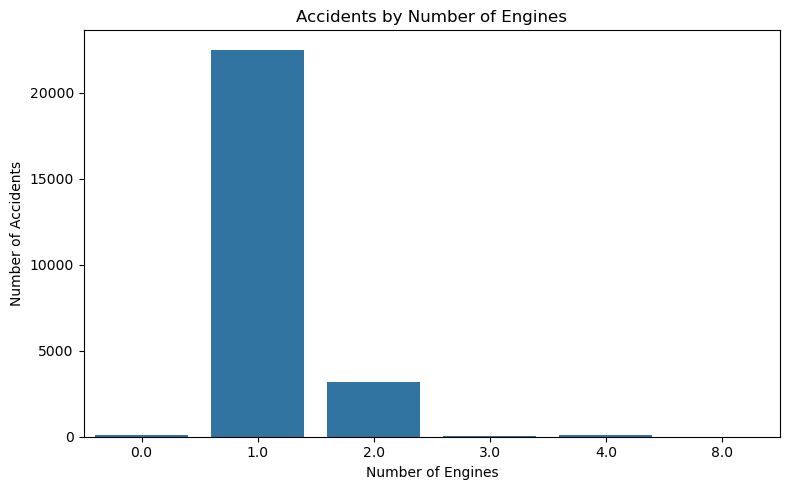

In [32]:
# we check the accident by number of engines in a plane
# first we group accidents by number of engine then we shall plot
engine_counts = df['Number.of.Engines'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=engine_counts.index, y=engine_counts.values)
plt.title('Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


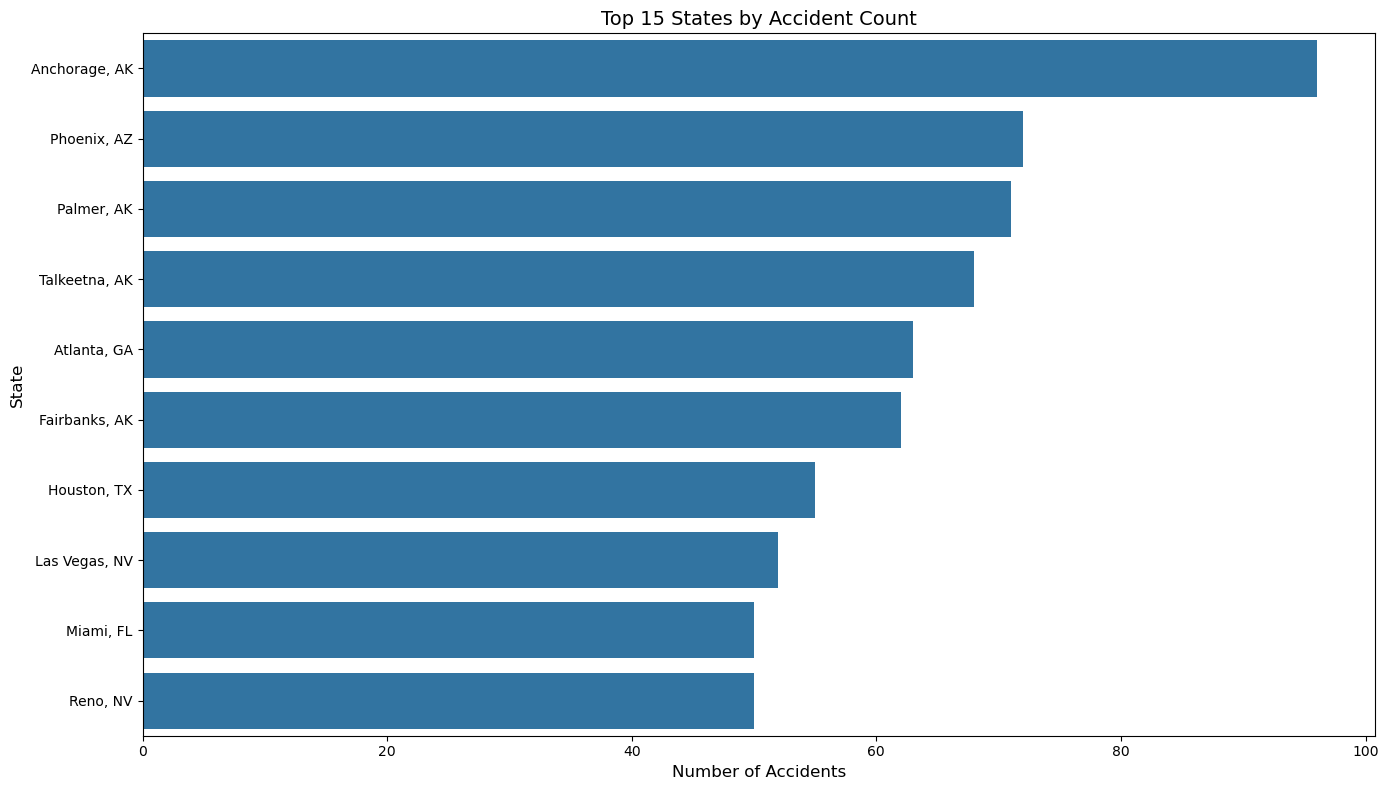

In [33]:
# geographical distribution of the accidents
plt.figure(figsize=(14, 8))
location_accidents = df['Location'].value_counts().head(10)
sns.barplot(x=location_accidents.values, y=location_accidents.index)
plt.title('Top 15 States by Accident Count', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
# we can save this for use in tableau
df.to_csv('aviation_analysis.csv', index=False)